In questo notebook vengono forniti diversi insight di interesse per la nostra analisi.

In [497]:
import pandas as pd
import numpy as np

In [498]:
df = pd.read_csv("/Users/lorenzofamiglini/Dropbox/Data_Management/dataframes_definitivi/rotten.csv")

In [499]:
df["genre"] = df["genre"].str.replace(' ', '') #elimino gli spazi dopo le virgol

In [500]:
df.dropna(subset = ["genre"], inplace = True, axis = 0)

In [501]:
df = df.reset_index()
mlb = MultiLabelBinarizer()
array_out = mlb.fit_transform(x)

In [502]:
## Funzione per splittare i generi e binarizzarli: 

In [503]:
x = df.apply(lambda x: x["genre"].split(","), axis=1) #splitto per dopo ogni virgola


In [504]:
from sklearn.preprocessing import MultiLabelBinarizer


In [505]:
mlb = MultiLabelBinarizer()
array_out = mlb.fit_transform(x) 


In [506]:
mlb.classes_ #i generi (sono 24 generi differenti) dei film salvati dentro

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype=object)

In [507]:
array_out[0]


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [508]:
df_out = pd.DataFrame(data=array_out, columns=mlb.classes_)


In [509]:
df = df.merge(df_out, right_on = df.index, left_on = df_out.index)


In [510]:
df.drop(["genre", "key_0"], inplace = True, axis = 1)


In [511]:
#df.to_csv("split_genres_tomato1.csv", index = False)


In [512]:
abs(df[df['Comedy'] == 1]["diff"]).mean()


1.1427530509691315

In [513]:
conta = 0
diz = {}
for i in df.columns:
    conta = conta +1
    if ((conta >= 15) & (conta <= 38)): #dalla colonna 15 alla 38 (sono esattamente i generi)
        diz[i] = abs(df[df[i] == True]['diff']).median()

In [514]:
bubble_rotten = pd.DataFrame.from_dict(diz, orient='index').round(2)
bubble_rotten = bubble_rotten.reset_index()

In [515]:
bubble_rotten = bubble_rotten.rename(columns={'index': 'genre', 0: 'diff_rotten'})
bubble_rotten["diff_rotten"] = bubble_rotten["diff_rotten"].round(2)

In [516]:
bubble_rotten.to_csv("bubble_tomato.csv")

In [517]:
bubble_rotten

,genre,diff_rotten
0,Action,1.10
1,Adult,1.41
2,Adventure,0.90
3,Animation,0.77
4,Biography,0.80
5,Comedy,1.00
6,Crime,0.97
7,Documentary,0.92
8,Drama,0.90
9,Family,1.02


In [518]:
bubble_rotten["diff_rotten"] = bubble_rotten["diff_rotten"]

In [519]:
from sklearn import preprocessing
x_array = np.array(bubble_rotten["diff_rotten"])
norm = preprocessing.normalize([x_array])

In [706]:
rott["differenza"] = rott["rating"] - rott["user_avg_rate"]

In [708]:
rott.sort_values(by = "differenza", ascending = False)

count_rotten        43.143461
Id                8908.847082
Year              1988.026559
rating               3.059879
StdDev               1.045414
count            12376.711268
diff                -0.208610
user_avg_rate        3.268487
differenza          -0.208608
dtype: float64

In [711]:
rott[rott["differenza"] > 0].count()

Movie            2546
count_rotten     2546
Id               2546
Year             2546
tconst           2546
actors           2541
director         2543
genre            2544
writer           2451
rating           2546
awards           2172
StdDev           2546
count            2546
diff             2546
user_avg_rate    2546
differenza       2546
dtype: int64

In [713]:
2546/4970*100

51.227364185110666

## User rating

In [521]:
df["user_avg_rate"]
conta = 0
diz = {}
dz = {}
for i in df.columns:
    conta = conta +1
    if ((conta >= 15) & (conta <= 38)): #dalla colonna 15 alla 38 (sono esattamente i generi)
        dz['count'] = df[df[i] == 1][i].count()
        dz['avg_user_rate'] = df[df[i] == 1]['user_avg_rate'].mean()
        diz[i] = dz #nested dictionary 
        dz = {}

In [522]:
diz

{'Action': {'count': 1124, 'avg_user_rate': 3.2712366548042704},
 'Adult': {'count': 12, 'avg_user_rate': 3.1183333333333336},
 'Adventure': {'count': 903, 'avg_user_rate': 3.3804097452934663},
 'Animation': {'count': 209, 'avg_user_rate': 3.547655502392345},
 'Biography': {'count': 397, 'avg_user_rate': 3.476624685138539},
 'Comedy': {'count': 2786, 'avg_user_rate': 3.2294938980617367},
 'Crime': {'count': 1382, 'avg_user_rate': 3.267250361794501},
 'Documentary': {'count': 344, 'avg_user_rate': 3.369883720930233},
 'Drama': {'count': 4154, 'avg_user_rate': 3.302079922965816},
 'Family': {'count': 547, 'avg_user_rate': 3.422449725776965},
 'Fantasy': {'count': 587, 'avg_user_rate': 3.30412265758092},
 'Film-Noir': {'count': 93, 'avg_user_rate': 3.5077419354838715},
 'History': {'count': 287, 'avg_user_rate': 3.511184668989547},
 'Horror': {'count': 702, 'avg_user_rate': 3.0235470085470086},
 'Music': {'count': 316, 'avg_user_rate': 3.3231012658227845},
 'Musical': {'count': 291, 'avg_

In [523]:
user_gen = pd.DataFrame.from_dict(diz, orient='index').round(2)

In [524]:
user_gen = user_gen.reset_index()

In [525]:
user_gen = user_gen.rename(columns={'index': 'genre'})

In [526]:
import seaborn as sns

In [527]:
user_gen2 = user_gen[user_gen["count"] >= user_gen["count"].median()]

(0, 4)

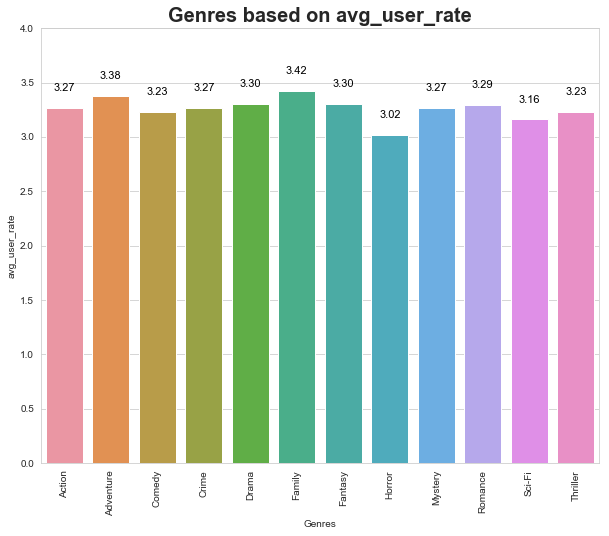

In [528]:
plt.figure(figsize=(10,8))
g = sns.barplot(x='genre', y='avg_user_rate', data = user_gen2)
plt.title ('Genres based on avg_user_rate', fontsize=20, fontweight='bold')
plt.xlabel('Genres')
plt.ylabel('avg_user_rate')
for item in g.get_xticklabels(): #ruotare le etichette 
    item.set_rotation(90)
ax = g
for p in ax.patches: #per mettere i valori su ogni bar
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
g.set_ylim(0,4)

In [529]:
user_gen2.sort_values(by = "avg_user_rate",ascending = False)

,genre,count,avg_user_rate
9,Family,547,3.42
2,Adventure,903,3.38
8,Drama,4154,3.30
10,Fantasy,587,3.30
17,Romance,1955,3.29
0,Action,1124,3.27
6,Crime,1382,3.27
16,Mystery,671,3.27
5,Comedy,2786,3.23
21,Thriller,1703,3.23


In [530]:
sorted_fl=df.sort_values(by="user_avg_rate",ascending=False)

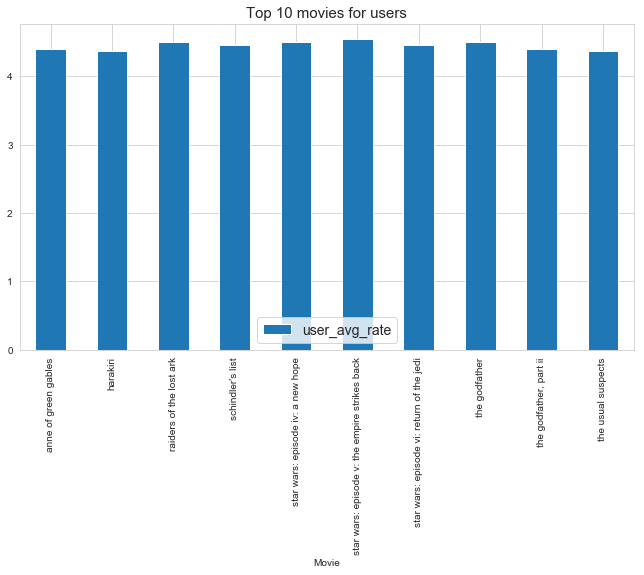

In [531]:
import matplotlib.pyplot as plt
top10fl=sorted_fl.head(10)
ax = top10fl[['user_avg_rate']].groupby(top10fl['Movie']).sum().plot.bar(stacked=True,figsize=(11,6))
plt.xticks(rotation=90,fontsize=10)
plt.legend(loc=0, prop={'size': 14})
plt.title('Top 10 movies for users',fontsize=15)
plt.show()

In [532]:
numeric = df[["Year","rating","StdDev","count","diff","user_avg_rate"]]

In [533]:
numeric["user_avg_rate"].mean()

3.2704212528876204

In [534]:
p = numeric["user_avg_rate"]*numeric["count"]

In [535]:
s = sum(p)

In [536]:
s/sum(numeric["count"])

3.5718004360185662

In [537]:
d = numeric["StdDev"]*numeric["count"]

In [538]:
s2 = sum(d)

In [539]:
s2/sum(numeric["count"])

0.9993297344461869

In [540]:
numeric2 = df[["Year","StdDev","count","diff","user_avg_rate"]]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6c40f0>,
      dtype=object)

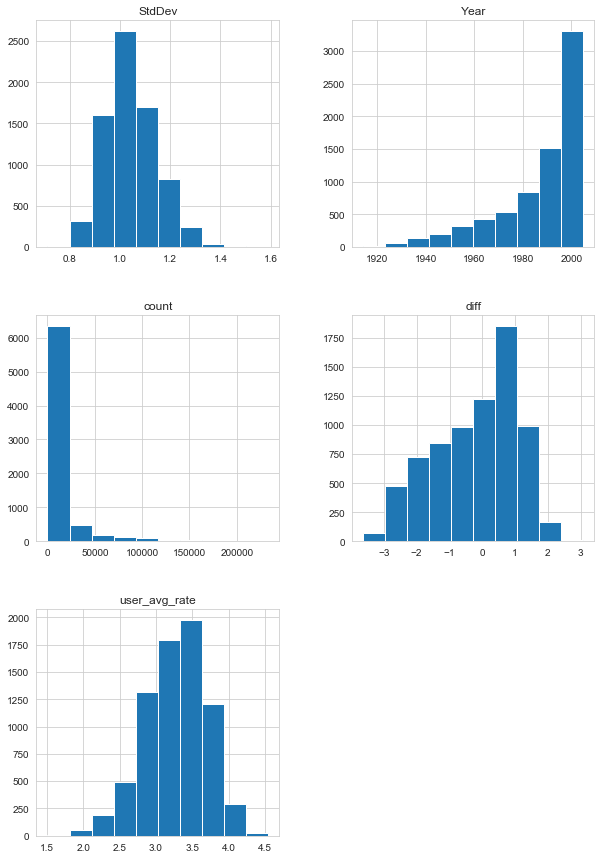

In [541]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
numeric2.hist(ax=ax)

## __Rotten rating based on genres:__

In [542]:
r = rott["rating"]*rott["count_rotten"]

In [543]:
r2 = sum(r)/sum(rott["count_rotten"])

In [544]:
r2 

3.111330874020024

In [545]:
rott["rating"].std()

1.3817804313124435

In [546]:
rott["rating"] =rott["rating"].replace(to_replace = 0, value = 1)

In [547]:
conta = 0
diz = {}
dz2 = {}
for i in df.columns:
    conta = conta +1
    if ((conta >= 15) & (conta <= 38)): #dalla colonna 15 alla 38 (sono esattamente i generi)
        dz2['count'] = df[df[i] == 1][i].count()
        dz2['rotten_rating'] = df[df[i] == 1]['rating'].mean()
        diz[i] = dz2 #nested dictionary 
        dz2 = {}

        

In [548]:
app = pd.DataFrame.from_dict(diz, orient='index').round(2)


In [549]:
app = app.reset_index()


In [550]:
app = app.rename(columns={'index': 'genre'})


In [551]:
app = app[app["count"] >= app["count"].median()]


(0, 5.5)

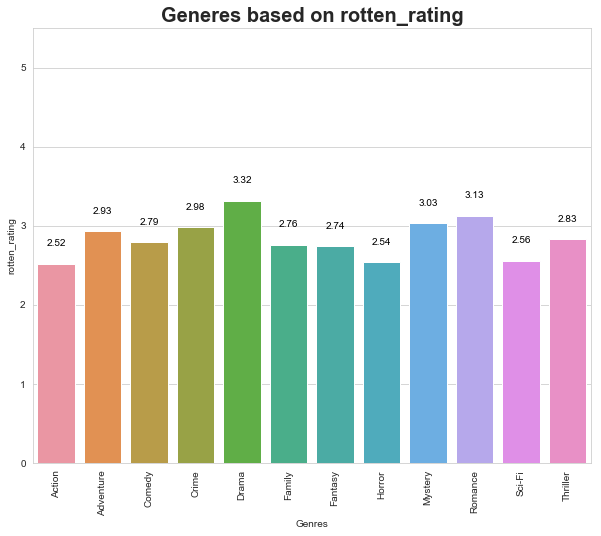

In [552]:
plt.figure(figsize=(10,8))
g = sns.barplot(x='genre', y='rotten_rating', data = app)
plt.title ('Generes based on rotten_rating', fontsize=20, fontweight='bold')
plt.xlabel('Genres')
plt.ylabel('rotten_rating')
for item in g.get_xticklabels(): #ruotare le etichette 
    item.set_rotation(90)
ax = g
for p in ax.patches: #per mettere i valori su ogni bar
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                 textcoords='offset points')
g.set_ylim(0,5.5)

In [553]:
app.sort_values(by = "rotten_rating",ascending = False)

,genre,count,rotten_rating
8,Drama,4154,3.32
17,Romance,1955,3.13
16,Mystery,671,3.03
6,Crime,1382,2.98
2,Adventure,903,2.93
21,Thriller,1703,2.83
5,Comedy,2786,2.79
9,Family,547,2.76
10,Fantasy,587,2.74
18,Sci-Fi,621,2.56


## __Metacritic rating based on genres:__




In [554]:
metac = pd.read_csv("/Users/lorenzofamiglini/Desktop/metac_sent.csv")

In [555]:
metac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 19 columns):
Positive         3660 non-null int64
Mixed            3660 non-null int64
Negative         3660 non-null int64
tconst           3660 non-null object
movie_id         3660 non-null int64
title            3660 non-null object
Year             3660 non-null int64
actors           3652 non-null object
director         3659 non-null object
genre            3658 non-null object
metascore        3660 non-null float64
writer           3557 non-null object
user_avg_rate    3660 non-null float64
StdDev           3660 non-null float64
count            3660 non-null int64
diff             3660 non-null float64
awards           3167 non-null object
tot_voti_met     3660 non-null int64
std_met          3657 non-null float64
dtypes: float64(5), int64(7), object(7)
memory usage: 543.4+ KB


In [556]:
m = metac["metascore"]*metac["tot_voti_met"]

In [557]:
m2 = sum(m)/sum(metac["tot_voti_met"])

In [558]:
m2

2.886872323595994

In [559]:
st2 = metac["std_met"]*metac["tot_voti_met"]

In [560]:
st2 = st2.dropna()

In [561]:
std2 = sum(st2)/sum(metac["tot_voti_met"])

In [562]:
std2

0.8178614803098953

In [563]:
metac["genre"] = metac["genre"].str.replace(' ', '') #elimino gli spazi dopo le virgol

In [564]:
metac.dropna(subset = ["genre"], inplace = True, axis = 0)

In [565]:
metac = metac.reset_index()
x = metac.apply(lambda x: x["genre"].split(","), axis=1) #splitto per dopo ogni virgola

In [566]:
mlb = MultiLabelBinarizer()
array_out = mlb.fit_transform(x) 

In [567]:
df_out2 = pd.DataFrame(data=array_out, columns=mlb.classes_)
df2 = metac.merge(df_out2, right_on = df_out2.index, left_on = metac.index)

In [568]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 3657
Data columns (total 45 columns):
key_0            3658 non-null int64
index            3658 non-null int64
Positive         3658 non-null int64
Mixed            3658 non-null int64
Negative         3658 non-null int64
tconst           3658 non-null object
movie_id         3658 non-null int64
title            3658 non-null object
Year             3658 non-null int64
actors           3650 non-null object
director         3657 non-null object
genre            3658 non-null object
metascore        3658 non-null float64
writer           3556 non-null object
user_avg_rate    3658 non-null float64
StdDev           3658 non-null float64
count            3658 non-null int64
diff             3658 non-null float64
awards           3166 non-null object
tot_voti_met     3658 non-null int64
std_met          3655 non-null float64
Action           3658 non-null int64
Adult            3658 non-null int64
Adventure        3658 non

In [569]:
conta = 0
diz = {}
dz2 = {}
for i in df2.columns:
    conta = conta +1
    if ((conta >= 21) & (conta <= 44)): #dalla colonna 15 alla 38 (sono esattamente i generi)
        dz2['count'] = df2[df2[i] == 1][i].count()
        dz2['metascore'] = df2[df2[i] == 1]['metascore'].mean()
        diz[i] = dz2 #nested dictionary 
        dz2 = {}


In [570]:
diz

{'std_met': {'count': 18, 'metascore': 2.6527777777777772},
 'Action': {'count': 624, 'metascore': 2.468028846153846},
 'Adult': {'count': 1, 'metascore': 2.05},
 'Adventure': {'count': 467, 'metascore': 2.745396145610278},
 'Animation': {'count': 108, 'metascore': 3.2287037037037036},
 'Biography': {'count': 198, 'metascore': 3.3227272727272728},
 'Comedy': {'count': 1450, 'metascore': 2.651},
 'Crime': {'count': 730, 'metascore': 2.781369863013699},
 'Documentary': {'count': 194, 'metascore': 3.408762886597938},
 'Drama': {'count': 2066, 'metascore': 3.0262584704743465},
 'Family': {'count': 282, 'metascore': 2.7671985815602835},
 'Fantasy': {'count': 306, 'metascore': 2.6671568627450983},
 'Film-Noir': {'count': 4, 'metascore': 4.9},
 'History': {'count': 118, 'metascore': 3.4330508474576273},
 'Horror': {'count': 308, 'metascore': 2.4376623376623376},
 'Music': {'count': 182, 'metascore': 2.9802197802197807},
 'Musical': {'count': 106, 'metascore': 3.1334905660377355},
 'Mystery': 

In [571]:
app2 = pd.DataFrame.from_dict(diz, orient='index').round(2)
app2 = app2.reset_index()

In [572]:
app2

,index,count,metascore
0,Action,624,2.47
1,Adult,1,2.05
2,Adventure,467,2.75
3,Animation,108,3.23
4,Biography,198,3.32
5,Comedy,1450,2.65
6,Crime,730,2.78
7,Documentary,194,3.41
8,Drama,2066,3.03
9,Family,282,2.77


In [573]:
app2 = app2.rename(columns={'index': 'genre'})

In [574]:
app2 = app2[app2["count"] >= app2["count"].median()]

In [721]:
import math

(array([215., 331., 365., 342., 385., 463., 538., 567., 841., 923.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

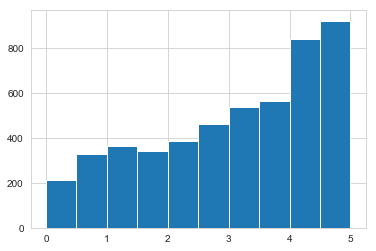

In [728]:
plt.hist(rott["rating"])

(0, 5.5)

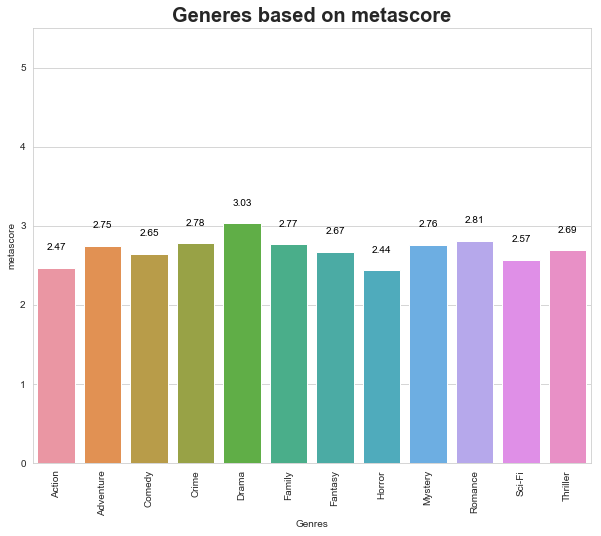

In [575]:
plt.figure(figsize=(10,8))
g = sns.barplot(x='genre', y='metascore', data = app2)
plt.title ('Generes based on metascore', fontsize=20, fontweight='bold')
plt.xlabel('Genres')
plt.ylabel('metascore')
for item in g.get_xticklabels(): #ruotare le etichette 
    item.set_rotation(90)
ax = g
for p in ax.patches: #per mettere i valori su ogni bar
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                 textcoords='offset points')
g.set_ylim(0,5.5)

In [576]:
app2.sort_values(by = "metascore", ascending = False)

,genre,count,metascore
8,Drama,2066,3.03
17,Romance,951,2.81
6,Crime,730,2.78
9,Family,282,2.77
16,Mystery,349,2.76
2,Adventure,467,2.75
21,Thriller,908,2.69
10,Fantasy,306,2.67
5,Comedy,1450,2.65
18,Sci-Fi,324,2.57


In [577]:
app2["count"].median()

545.5

## Popularity
__Popularity is a very important metric here on TMDb__. It helps us boost search results, adds an incredibly useful sort value for , and is also just kind of fun to see items chart up and down.

Each model builds their popularity value slightly differently. If you're curious as to the how and why, check out the information below

__Movies__

• Number of votes for the day

• Number of views for the day

• Number of users who marked it as a "favourite" for the day

• Number of users who added it to their "watchlist" for the day

• Release date

• Number of total votes

• Previous days score

In [578]:
numeric = df[["Year","rating","StdDev","count","diff","user_avg_rate"]]

In [579]:
pop = pd.read_csv("/Users/lorenzofamiglini/Desktop/tmdb-movies-new.csv")
rott = pd.read_csv("/Users/lorenzofamiglini/Desktop/rotten_count.csv")

In [580]:
match = rott.merge(pop, left_on ='tconst', right_on = 'imdb_id')

In [581]:
match["revenue_adj"] = match["revenue_adj"].map(int) #convertire valore esponenziale in decimale 
match["budget_adj"] = match["budget_adj"].map(int)

In [582]:
match["revenue_adj"] = pd.to_numeric(match["revenue_adj"])

In [583]:
match2 = match.query('revenue != 0') #filtro le revenue nulle/missing values, in modo tale da avere il dataset pulito
match2 = match.query('budget!= 0')

In [584]:
d = ['homepage', 'tagline', 'overview','original_title', 'cast', 'director_y','genres', 'production_companies', 'release_year', 'release_date','vote_count', 'vote_average', 'id', "imdb_id","writer","director_x","actors","genre","awards"]
match.drop(d, axis=1, inplace=True)

In [585]:
match2.drop(d, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [690]:
pop

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [682]:
p_mean = pop.groupby('release_year')['popularity'].mean()
#p_median = pop.groupby('release_year')['popularity'].median()

In [683]:
#idxmedian = p_median.index
idxmean = p_mean.index

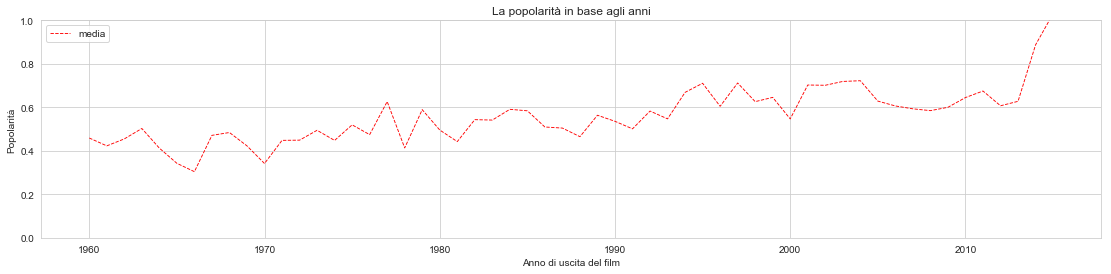

In [696]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(19, 4))
x, y = idxmean, p_mean
#x2, y2 = idxmedian, p_median
ax = sns.lineplot(x,y, label = 'media', color = "r",linewidth=0.9)
#ax2 = sns.lineplot(x2,y2, label = 'mediana', color = "b", linewidth = 1)
ax.lines[0].set_linestyle("--")
plt.title('La popolarità in base agli anni')
plt.xlabel('Anno di uscita del film')
plt.ylabel('Popolarità')
#set legend
plt.legend(loc='upper left')
ax.set_ylim(0,1)
fig = ax.get_figure()
fig.savefig("popolarità.png") 

__Guardando l'andamento della popolarità media in base all'anno di uscita dei film possiamo affermare che quelli con maggiore popolarità sono quelli dal 95 in poi. Potrebbe essere che gli utenti sono più interessati alla ricerca di film più recenti rispetto a quelli passati che su internet è più facile trovare film in streaming usciti di recente (circa gli ultimi 20 anni), quindi le persone sono volte a cercare quelli più facilmente reperibili.__

In [648]:
pop["popularity"]

0        32.985763
1        28.419936
2        13.112507
3        11.173104
4         9.335014
5         9.110700
6         8.654359
7         7.667400
8         7.404165
9         6.326804
10        6.200282
11        6.189369
12        6.118847
13        5.984995
14        5.944927
15        5.898400
16        5.749758
17        5.573184
18        5.556818
19        5.476958
20        5.462138
21        5.337064
22        4.907832
23        4.710402
24        4.648046
25        4.566713
26        4.564549
27        4.503789
28        4.062293
29        3.968891
           ...    
10836     0.239435
10837     0.291704
10838     0.151845
10839     0.276133
10840     0.102530
10841     0.264925
10842     0.253437
10843     0.252399
10844     0.236098
10845     0.230873
10846     0.212716
10847     0.034555
10848     0.207257
10849     0.206537
10850     0.202473
10851     0.342791
10852     0.227220
10853     0.163592
10854     0.146402
10855     0.141026
10856     0.140934
10857     0.

In [590]:
delet = rott.query('Year < 2005')

In [692]:
num_y = pop.groupby('release_year').count()["original_title"]

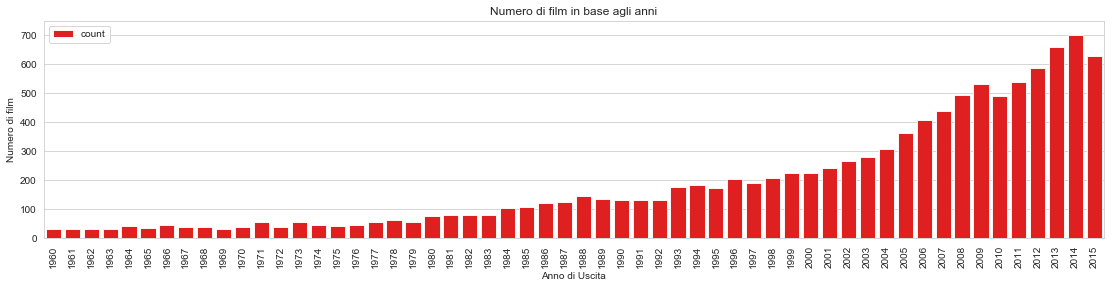

In [701]:
idxy = num_y.index
sns.set_style('whitegrid')
plt.figure(figsize=(19, 4))
y,x =  num_y, idxy
g =sns.barplot(x,y, label = 'count', color = "r",linewidth=0.9)
plt.legend(loc='upper left')
plt.xticks(rotation=90,fontsize=10)
plt.title('Numero di film in base agli anni')
#g = sns.lineplot(x,y, label = 'count', color = "blue",linewidth=1.5)
g.set(xlabel='Anno di Uscita', ylabel='Numero di film')
g.set_ylim(0,750)
fig = g.get_figure()
fig.savefig("MovieCount.png") 

In [702]:
rott

,Movie,count_rotten,Id,Year,tconst,actors,director,genre,writer,rating,awards,StdDev,count,diff,user_avg_rate
0,miss_congeniality,115,5317,2000,tt0212346,"Sandra Bullock, Michael Caine, Benjamin Bratt,...",Donald Petrie,"Action, Comedy, Crime, Romance","Marc Lawrence, Katie Ford, Caryn Lucas",2.10,Nominated for 2 Golden Globes. Another 7 wins ...,1.11,232944,-1.26,3.36
1,pirates_of_the_caribbean_the_curse_of_the_blac...,216,1905,2003,tt0325980,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",Gore Verbinski,"Action, Adventure, Fantasy","Ted Elliott (screen story), Terry Rossio (scre...",3.15,Nominated for 5 Oscars. Another 36 wins & 96 n...,0.91,193941,-1.00,4.15
2,pretty_woman,66,6287,1990,tt0100405,"Richard Gere, Julia Roberts, Ralph Bellamy, Ja...",Garry Marshall,"Comedy, Romance",J.F. Lawton,3.10,Nominated for 1 Oscar. Another 8 wins & 10 nom...,1.03,193295,-0.81,3.91
3,forrest_gump,95,11283,1994,tt0109830,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Robert Zemeckis,"Drama, Romance","Winston Groom (novel), Eric Roth (screenplay)",3.60,Won 6 Oscars. Another 40 wins & 67 nominations.,0.90,181508,-0.70,4.30
4,the_green_mile,133,16377,1999,tt0120689,"Tom Hanks, David Morse, Bonnie Hunt, Michael C...",Frank Darabont,"Crime, Drama, Fantasy, Mystery","Stephen King (novel), Frank Darabont (screenplay)",3.95,Nominated for 4 Oscars. Another 15 wins & 32 n...,0.86,181426,-0.36,4.31
5,con_air,65,16242,1997,tt0118880,"Colm Meaney, Mykelti Williamson, Nick Chinlund...",Simon West,"Action, Crime, Thriller",Scott Rosenberg,2.75,Nominated for 2 Oscars. Another 7 wins & 9 nom...,1.06,178068,-0.70,3.45
6,sweet_home_alabama,158,15582,2002,tt0256415,"Reese Witherspoon, Josh Lucas, Patrick Dempsey...",Andy Tennant,"Comedy, Romance","Douglas J. Eboch (story), C. Jay Cox (screenplay)",1.90,3 wins & 6 nominations.,1.08,176539,-1.64,3.54
7,armageddon,120,6972,1998,tt0120591,"Bruce Willis, Billy Bob Thornton, Ben Affleck,...",Michael Bay,"Action, Adventure, Sci-Fi, Thriller","Jonathan Hensleigh (screenplay), J.J. Abrams (...",1.90,Nominated for 4 Oscars. Another 15 wins & 35 n...,1.12,171991,-1.68,3.58
8,what_women_want,122,2152,2000,tt0207201,"Mel Gibson, Helen Hunt, Marisa Tomei, Alan Alda",Nancy Meyers,"Comedy, Fantasy, Romance","Josh Goldsmith (story), Cathy Yuspa (story), D...",2.70,Nominated for 1 Golden Globe. Another 5 wins &...,1.07,162597,-0.73,3.43
9,bruce_almighty,189,3860,2003,tt0315327,"Jim Carrey, Morgan Freeman, Jennifer Aniston, ...",Tom Shadyac,"Comedy, Drama, Fantasy","Steve Koren (story), Mark O'Keefe (story), Ste...",2.45,7 wins & 8 nominations.,1.00,160454,-0.98,3.43


In [594]:
medrate = match[match["count"] >= match["count"].median()]
medrate = match[match["count_rotten"] >= match["count_rotten"].median()]

In [595]:
dfn2 = medrate.sort_values('user_avg_rate', ascending= False)

In [596]:
dfn2

,Movie,count_rotten,Id,Year,tconst,rating,StdDev,count,diff,user_avg_rate,popularity,budget,revenue,keywords,runtime,budget_adj,revenue_adj
62,raiders_of_the_lost_ark,75,10042,1981,tt0082971,4.75,0.71,118212,0.25,4.50,4.578300,18000000,389925971,saving the world|riddle|nepal|himalaya|cairo,115,43167434,935116878
91,the_godfather,90,12293,1972,tt0068646,5.00,0.79,106327,0.50,4.50,5.738034,6000000,245066411,italy|love at first sight|loss of father|patri...,175,31287365,1277913732
153,star_wars_episode_vi_return_of_the_jedi,90,9628,1983,tt0086190,4.05,0.80,88846,-0.41,4.46,4.828854,32350000,572700000,rebel|emperor|space battle|matter of life and ...,135,70824243,1253818981
111,schindlers_list,95,12870,1993,tt0108052,4.85,0.78,101141,0.39,4.46,2.377288,22000000,321265768,factory|concentration camp|hero|holocaust|worl...,195,33208339,484941026
332,toy_story,82,13673,1995,tt0114709,5.00,0.79,51306,0.65,4.35,4.282462,30000000,361958736,jealousy|toy|boy|friendship|friends,81,42929006,517950958
27,indiana_jones_and_the_last_crusade,69,16954,1989,tt0097576,4.40,0.82,144320,0.07,4.33,3.536655,48000000,474171806,saving the world|venice|holy grail|library|riddle,127,84431277,834061065
4,the_green_mile,133,16377,1999,tt0120689,3.95,0.86,181426,-0.36,4.31,2.719461,60000000,284600000,southern u.s.|black people|mentally disabled|i...,189,78543170,372556440
47,the_silence_of_the_lambs,91,2862,1991,tt0102926,4.80,0.82,128446,0.49,4.31,0.695385,19000000,272742922,based on novel|psychopath|horror|suspense|seri...,118,30420763,436686740
137,hotel_rwanda,193,11607,2005,tt0395169,4.55,0.83,92345,0.24,4.31,0.787185,17500000,38000000,rwanda|refugee|refugee camp|militia|murder,121,20202794,43868925
3,forrest_gump,95,11283,1994,tt0109830,3.60,0.90,181508,-0.70,4.30,6.715966,55000000,677945399,vietnam veteran|hippie|mentally disabled|runni...,142,80911135,997333314


In [630]:
match

,Movie,count_rotten,Id,Year,tconst,rating,StdDev,count,diff,user_avg_rate,popularity,budget,revenue,keywords,runtime,budget_adj,revenue_adj
0,miss_congeniality,115,5317,2000,tt0212346,2.10,1.11,232944,-1.26,3.36,1.073638,45000000,212000000,undercover agent|beauty contest|terrorism,111,56983145,268453928
1,pirates_of_the_caribbean_the_curse_of_the_blac...,216,1905,2003,tt0325980,3.15,0.91,193941,-1.00,4.15,6.864067,140000000,655011224,exotic island|east india trading company|gold|...,143,165949370,776419286
2,pretty_woman,66,6287,1990,tt0100405,3.10,1.03,193295,-0.81,3.91,2.212092,14000000,463000000,prostitute|capitalism|cinderella|expensive res...,119,23364579,772700024
3,forrest_gump,95,11283,1994,tt0109830,3.60,0.90,181508,-0.70,4.30,6.715966,55000000,677945399,vietnam veteran|hippie|mentally disabled|runni...,142,80911135,997333314
4,the_green_mile,133,16377,1999,tt0120689,3.95,0.86,181426,-0.36,4.31,2.719461,60000000,284600000,southern u.s.|black people|mentally disabled|i...,189,78543170,372556440
5,con_air,65,16242,1997,tt0118880,2.75,1.06,178068,-0.70,3.45,1.368403,75000000,224012234,prison|ambush|helicopter|airport|gas station,115,101884524,304311731
6,sweet_home_alabama,158,15582,2002,tt0256415,1.90,1.08,176539,-1.64,3.54,0.895023,30000000,180622424,new york|marriage proposal|alabama|career woma...,108,36367841,218961591
7,armageddon,120,6972,1998,tt0120591,1.90,1.12,171991,-1.68,3.58,2.993102,140000000,553799566,saving the world|paris|moon|cataclysm|asteroid,151,187277365,740815170
8,what_women_want,122,2152,2000,tt0207201,2.70,1.07,162597,-0.73,3.43,1.767681,70000000,374111707,women|telepathy|supernatural powers|advertisin...,127,88640448,473734704
9,bruce_almighty,189,3860,2003,tt0315327,2.45,1.00,160454,-0.98,3.43,2.899533,80000000,484572835,christianity|moon|responsability|moses|street ...,101,94828211,574389691


In [603]:
#splittiamo in quantili runtime in modo tale da avere quattro livelli: 
dfn2['runtime'] = pd.qcut(dfn2['runtime'], 4, labels = ["Low","Moderate", "Medium", "High"])
dfn2.head(1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [631]:
#splittiamo in quantili runtime in modo tale da avere quattro livelli: 
match['runtime'] = pd.qcut(match['runtime'], 4, labels = ["Low","Moderate", "Medium", "High"])

In [640]:
match.to_csv("runtimeuserrot2.csv")

In [656]:
result_median = match.groupby('runtime')['user_avg_rate'].mean()
result_median

runtime
Low         3.212134
Moderate    3.258549
Medium      3.402561
High        3.543006
Name: user_avg_rate, dtype: float64

In [657]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars

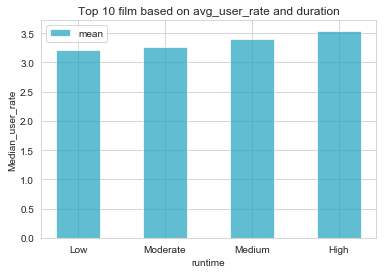

In [659]:
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='mean')
# title and labels
plt.ylabel('Median_user_rate')
plt.xlabel('runtime')
plt.title('Top 10 film based on avg_user_rate and duration')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

Da questo grafico si nota che al crescere della durata dei film, il punteggio mediano degli utenti di netflix tende a salire in modo costante. Non si delinea una grande differenza ma possiamo vedere una variazione tra la durata dei film, dove High risulta il più elevato. 

In [62]:
xxx = rott.groupby('Movie').sum()['user_avg_rate'].sort_values(ascending= False).head(10)

(0, 5)

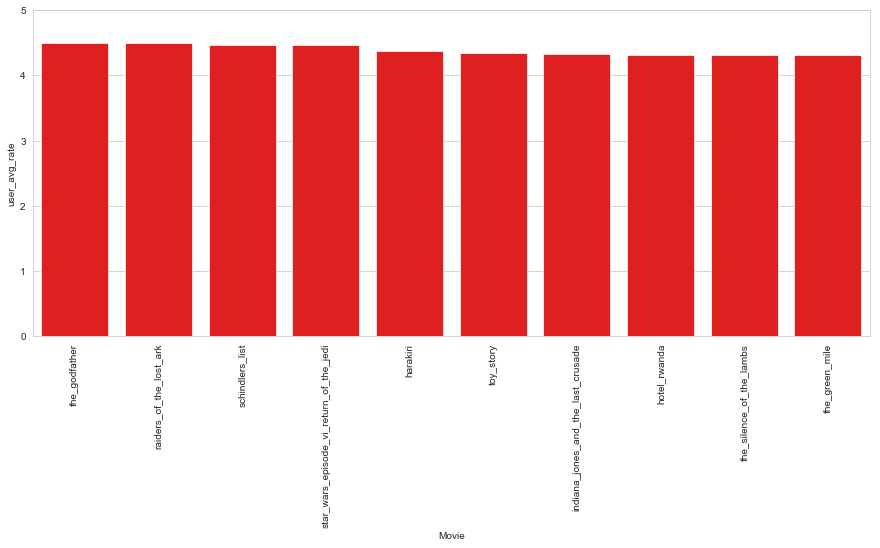

In [63]:
idxy = xxx.index
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))
y,x =  xxx, idxy
g =sns.barplot(x,y, label = 'user avg rate', color = "r",linewidth=0.7)
#plt.legend(loc='upper left')
plt.xticks(rotation=90,fontsize=10)
#g.set(xlabel='Years', ylabel='Movie Count')


In [652]:
xxx

,Movie,user_avg_rate
0,the_godfather,4.50
1,raiders_of_the_lost_ark,4.50
2,schindlers_list,4.46
3,star_wars_episode_vi_return_of_the_jedi,4.46
4,harakiri,4.37
5,toy_story,4.35
6,indiana_jones_and_the_last_crusade,4.33
7,hotel_rwanda,4.31
8,the_silence_of_the_lambs,4.31
9,the_green_mile,4.31


In [635]:
dfn3 = match.sort_values('rating', ascending= False) #rotten rating

In [636]:
#dfn3['runtime'] = pd.qcut(dfn3['runtime'], 4, labels = ["Low","Moderate", "Medium", "High"])
#dfn3.head(1)

ValueError: Bin edges must be unique: array(['High', 'Low', 'Medium', 'Medium', 'Moderate'], dtype=object).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [660]:
result_median2 = match.groupby('runtime')['rating'].mean()
result_median2

runtime
Low         2.386052
Moderate    2.585257
Medium      3.026818
High        3.365348
Name: rating, dtype: float64

In [661]:
ind2 = np.arange(len(result_median2))  # the x locations for the groups
width = 0.5       # the width of the bars

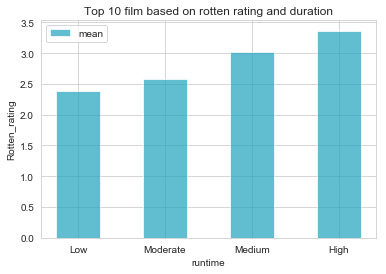

In [663]:
bars = plt.bar(ind2, result_median2, width, color='#1ea2bc', alpha=.7, label='mean')
# title and labels
plt.ylabel('Rotten_rating')
plt.xlabel('runtime')
plt.title('Top 10 film based on rotten rating and duration')
locations = ind  # xtick locations，345...
labels = result_median2.index  
plt.xticks(locations, labels)
# legend
plt.legend()

Confrontando invece i voti dei critici vediamo come si demarca un distacco molto più consistente tra le varie durate dei film.

In [654]:
sss = rott.sort_values(by = "rating", ascending = False)

In [655]:
sss

,Movie,count_rotten,Id,Year,tconst,actors,director,genre,writer,rating,awards,StdDev,count,diff,user_avg_rate
1012,sleeper,30,13542,1973,tt0070707,"Woody Allen, Diane Keaton, John Beck, Mary Gre...",Woody Allen,"Comedy, Sci-Fi","Woody Allen, Marshall Brickman",5.0,2 wins & 2 nominations.,1.04,14619,1.32,3.68
1497,modern_times,54,1708,1936,tt0027977,"Charles Chaplin, Paulette Goddard, Henry Bergm...",Charles Chaplin,"Comedy, Drama, Family, Romance",Charles Chaplin,5.0,4 wins & 1 nomination.,1.00,7460,1.05,3.95
4700,salvatore_giuliano,15,5134,1961,tt0055399,"Salvo Randone, Frank Wolff",Francesco Rosi,"Crime, Drama, History, Mystery","Suso Cecchi D'Amico, Enzo Provenzale, Francesc...",5.0,6 wins & 3 nominations.,1.20,153,1.77,3.23
4701,kwik_stop,5,13731,2001,tt0212292,"Michael Gilio, Lara Phillips, Rich Komenich, K...",Michael Gilio,Comedy,Michael Gilio,5.0,2 wins & 3 nominations.,1.02,153,2.24,2.76
4425,the_late_show,15,16244,1977,tt0076301,"Art Carney, Lily Tomlin, Bill Macy, Eugene Roche",Robert Benton,"Comedy, Mystery, Thriller",Robert Benton,5.0,Nominated for 1 Oscar. Another 4 wins & 6 nomi...,1.10,247,1.93,3.07
3572,la_belle_noiseuse,29,4971,1991,tt0101428,"Michel Piccoli, Jane Birkin, Emmanuelle Béart,...",Jacques Rivette,Drama,"Pascal Bonitzer (scenario), Christine Laurent ...",5.0,5 wins & 6 nominations.,1.08,787,1.77,3.23
2721,bastard_out_of_carolina,9,9738,1996,tt0115633,"Jennifer Jason Leigh, Ron Eldard, Glenne Headl...",Anjelica Huston,Drama,"Dorothy Allison (book), Anne Meredith (teleplay)",5.0,Won 1 Primetime Emmy. Another 5 wins & 17 nomi...,1.02,2121,1.57,3.43
3575,dont_bother_to_knock,9,921,1952,tt0044557,"Richard Widmark, Marilyn Monroe, Anne Bancroft...",Roy Ward Baker,"Drama, Film-Noir, Mystery, Thriller","Daniel Taradash (screenplay), Charlotte Armstr...",5.0,NaN,1.02,785,1.67,3.33
3595,the_hospital,11,4051,1971,tt0067217,"George C. Scott, Diana Rigg, Barnard Hughes, R...",Arthur Hiller,"Comedy, Drama, Mystery",Paddy Chayefsky (by),5.0,Won 1 Oscar. Another 6 wins & 5 nominations.,1.05,767,1.55,3.45
4713,divorce_american_style,5,9797,1967,tt0061581,"Dick Van Dyke, Debbie Reynolds, Jason Robards,...",Bud Yorkin,Comedy,"Robert Kaufman (story), Norman Lear (screenplay)",5.0,Nominated for 1 Oscar. Another 2 nominations.,1.03,147,2.14,2.86


In [ ]:
sss.sort_values(by = "", ascending = False)

In [73]:
xxx2 = rott.groupby('Movie').sum()['rating'].sort_values(ascending= False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

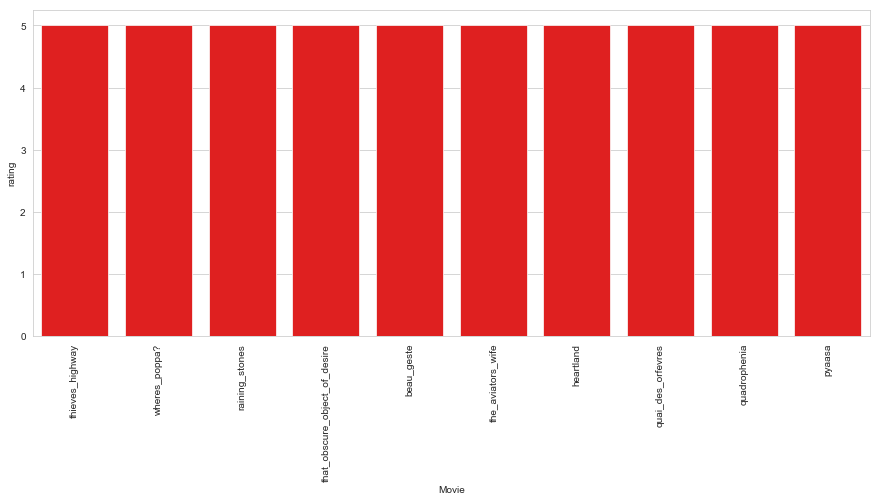

In [74]:
idxy = xxx2.index
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))
y,x =  xxx2, idxy
g =sns.barplot(x,y, label = 'rating', color = "r",linewidth=0.7)
#plt.legend(loc='upper left')
plt.xticks(rotation=90,fontsize=10)
#g.set(xlabel='Years', ylabel='Movie Count')
#.set_ylim(0,5)

In [75]:
match[match["rating"] == 5]["count_rotten"].median()

21.0

In [76]:
xxx = xxx.to_frame().reset_index()

In [77]:
xxx2 = xxx2.to_frame().reset_index()

In [78]:
confronto = xxx2.merge(xxx, left_on = 'Movie', right_on = "Movie")

In [466]:
rott[rott["Movie"] == "titanic"]

,Movie,count_rotten,Id,Year,tconst,actors,director,genre,writer,rating,awards,StdDev,count,diff,user_avg_rate
30,titanic,187,16879,1997,tt0120338,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",James Cameron,"Drama, Romance",James Cameron,4.45,Won 11 Oscars. Another 111 wins & 77 nominations.,1.13,143668,0.74,3.71


In [624]:
metac = pd.read_csv("/Users/lorenzofamiglini/Desktop/metac_sent.csv")
pop = pd.read_csv("/Users/lorenzofamiglini/Desktop/tmdb-movies-new.csv")

In [625]:
metac

,Positive,Mixed,Negative,tconst,movie_id,title,Year,actors,director,genre,metascore,writer,user_avg_rate,StdDev,count,diff,awards,tot_voti_met,std_met
0,4,5,2,tt0217978,6341,r-xmas,2001,"Drea de Matteo, Lillo Brancato, Lisa Valens, I...",Abel Ferrara,"Crime, Drama",2.75,"Cassandra De Jesus (story), Abel Ferrara, Scot...",2.10,0.97,130,0.65,2 wins & 2 nominations.,11,1.073728
1,3,6,0,tt0078718,7756,...and justice for all,1979,"Al Pacino, Jack Warden, John Forsythe, Lee Str...",Norman Jewison,"Crime, Drama, Thriller",2.90,"Valerie Curtin, Barry Levinson",3.67,0.89,6350,-0.77,Nominated for 2 Oscars. Another 1 win & 1 nomi...,9,0.707107
2,4,1,2,tt0078721,2945,10,1979,"Dudley Moore, Julie Andrews, Bo Derek, Robert ...",Blake Edwards,"Comedy, Romance",3.40,Blake Edwards,3.13,0.96,4928,0.27,Nominated for 2 Oscars. Another 9 nominations.,7,1.320946
3,18,7,1,tt0147800,3463,10 things i hate about you,1999,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",Gil Junger,"Comedy, Drama, Romance",3.50,"Karen McCullah, Kirsten Smith",3.74,0.98,46978,-0.24,2 wins & 12 nominations.,26,0.826028
4,1,0,5,tt0085121,11972,10 to midnight,1983,"Charles Bronson, Lisa Eilbacher, Andrew Steven...",J. Lee Thompson,"Crime, Drama, Thriller",0.60,William Roberts,3.26,0.99,626,-2.66,NaN,6,1.118034
5,7,5,12,tt0211181,10198,102 dalmatians,2000,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",Kevin Lima,"Adventure, Comedy, Family",1.75,"Dodie Smith (novel), Kristen Buckley (story), ...",3.24,1.04,4814,-1.49,Nominated for 1 Oscar. Another 1 win & 6 nomin...,24,1.297534
6,3,1,0,tt0331811,732,11:14,2005,"Henry Thomas, Blake Heron, Barbara Hershey, Cl...",Greg Marcks,"Crime, Drama, Horror, Mystery, Thriller",3.25,Greg Marcks,3.23,1.01,2563,0.02,1 win & 8 nominations.,4,0.649519
7,10,0,0,tt0050083,9528,12 angry men,1957,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Sidney Lumet,"Crime, Drama",4.80,"Reginald Rose (story), Reginald Rose (screenplay)",4.17,0.84,35109,0.63,Nominated for 3 Oscars. Another 16 wins & 8 no...,10,0.000000
8,20,15,0,tt0337563,16082,13 going on 30,2004,"Jennifer Garner, Mark Ruffalo, Judy Greer, And...",Gary Winick,"Comedy, Fantasy, Romance",2.85,"Josh Goldsmith, Cathy Yuspa",3.56,1.00,105518,-0.71,11 nominations.,35,0.742307
9,4,6,0,tt0331338,6364,16 years of alcohol,2003,"Kevin McKidd, Laura Fraser, Susan Lynch, Stuar...",Richard Jobson,"Crime, Drama",2.85,Richard Jobson,2.39,1.22,132,0.46,4 wins & 9 nominations.,10,0.734847


In [641]:
match3 = metac.merge(pop, left_on ='tconst', right_on = 'imdb_id')

In [618]:
#match3.dropna(inplace = True)

In [619]:
delet2 = match3.query('Year < 2005')

In [643]:
match3["runtime"] = pd.qcut(match3['runtime'], 4, labels = ["Low","Moderate", "Medium", "High"])

In [645]:
match3.to_csv("runtimemetacusers.csv")

In [664]:
result_mean3 = match3.groupby('runtime')['metascore'].mean()

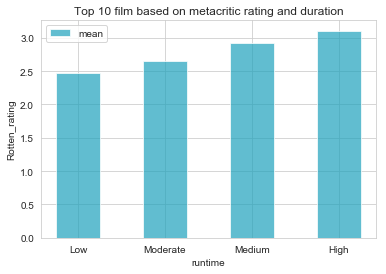

In [667]:
ind2 = np.arange(len(result_mean3))  # the x locations for the groups
width = 0.5       # the width of the bars
bars = plt.bar(ind2, result_mean3, width, color='#1ea2bc', alpha=.7, label='mean')
# title and labels
plt.ylabel('Rotten_rating')
plt.xlabel('runtime')
plt.title('Top 10 film based on metacritic rating and duration')
locations = ind  # xtick locations，345...
labels = result_mean3.index  
plt.xticks(locations, labels)
# legend
plt.legend()

In [ ]:
a

In [621]:
#medrate2 = match3[match["count"] >= match3["count"].median()]
#medrate2 = match3[match["count_rotten"] >= match3["count_rotten"].median()]

In [613]:
metac = metac[metac["count"] >= metac["count"].median()]
metac = metac[metac["tot_voti_met"] >= metac["tot_voti_met"].median()]
metac = metac.drop_duplicates(subset = 'title')

In [615]:
match3

,Positive,Mixed,Negative,tconst,movie_id,title,Year,actors,director_x,genre,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,31,5,5,tt0315733,11173,21 grams,2003,"Sean Penn, Naomi Watts, Danny Huston, Carly Nahon",Alejandro G. Iñárritu,"Crime, Drama, Thriller",...,This is the story of three gentle persons: Pau...,124,Drama|Crime|Thriller,This Is That Productions|Y Productions|Mediana...,9/6/03,520,7.0,2003,2.370705e+07,7.162830e+07
13,29,0,0,tt0274309,3506,24 hour party people,2002,"Steve Coogan, John Thomson, Paul Popplewell, L...",Michael Winterbottom,"Biography, Comedy, Drama, Music",...,Manchester 1976: Cambridge educated Tony Wilso...,117,Comedy|Drama,WAVEpictures|The Film Consortium|Baby Cow Prod...,2/13/02,53,6.6,2002,0.000000e+00,0.000000e+00
27,34,4,0,tt0298203,12471,8 mile,2002,"Eminem, Kim Basinger, Mekhi Phifer, Brittany M...",Curtis Hanson,"Drama, Music",...,The setting is Detroit in 1995. The city is di...,110,Drama,Imagine Entertainment|Mikona Productions GmbH ...,11/8/02,944,6.7,2002,4.970272e+07,2.606362e+08
30,22,9,2,tt0268978,1180,a beautiful mind,2001,"Russell Crowe, Ed Harris, Jennifer Connelly, C...",Ron Howard,"Biography, Drama",...,"At Princeton University, John Nash struggles t...",135,Drama|Romance,Imagine Entertainment|DreamWorks SKG|Universal...,12/11/01,1786,7.5,2001,7.388929e+07,3.861237e+08
32,18,5,0,tt0120623,6510,a bug's life,1998,"Dave Foley, Kevin Spacey, Julia Louis-Dreyfus,...","John Lasseter, Andrew Stanton(co-director)","Animation, Adventure, Comedy, Family, Fantasy",...,"On behalf of ""oppressed bugs everywhere,"" an i...",95,Family|Animation,Walt Disney Pictures|Pixar Animation Studios,11/25/98,1159,6.6,1998,1.605235e+08,4.861166e+08
35,0,9,21,tt0356470,2457,a cinderella story,2004,"Hilary Duff, Jennifer Coolidge, Chad Michael M...",Mark Rosman,"Comedy, Family, Romance",...,"Sam Montgomery is a tomboyish, unpopular girl ...",95,Comedy,Gaylord Films|Warner Bros.|Dylan Sellers Produ...,7/10/04,379,5.9,2004,2.193446e+07,8.088958e+07
38,16,11,7,tt0365125,1771,a dirty shame,2004,"Tracey Ullman, Johnny Knoxville, Selma Blair, ...",John Waters,Comedy,...,Sylvia Stickles runs a convenience store with ...,89,Comedy,Fine Line Features|Killer Films|John Wells Pro...,9/12/04,27,5.5,2004,1.731668e+07,2.209800e+06
39,12,6,3,tt0104257,16668,a few good men,1992,"Tom Cruise, Jack Nicholson, Demi Moore, Kevin ...",Rob Reiner,"Drama, Thriller",...,When cocky military lawyer Lt. Daniel Kaffee a...,138,Drama|Thriller,Castle Rock Entertainment|Columbia Pictures Co...,12/11/92,502,6.9,1992,6.216097e+07,3.780011e+08
49,3,17,12,tt0266465,4389,a man apart,2003,"Vin Diesel, Larenz Tate, Timothy Olyphant, Gen...",F. Gary Gray,"Action, Crime, Drama, Thriller",...,When Vetter's wife is killed in a botched hit ...,109,Action|Drama,New Line Cinema|Newman/Tooley Films|Joseph Nit...,4/4/03,152,5.7,2003,4.267270e+07,5.257149e+07
69,4,8,14,tt0281358,6235,a walk to remember,2002,"Shane West, Mandy Moore, Peter Coyote, Daryl H...",Adam Shankman,"Drama, Romance",...,"When the popular, restless Landon Carter is fo...",101,Drama|Family|Romance,Pandora Pictures|Warner Bros.,1/25/02,582,7.3,2002,1.333488e+07,4.997798e+07


In [112]:
xxx4 = metac.groupby('title').sum()['metascore'].sort_values(ascending= False).head(10)

(0, 5)

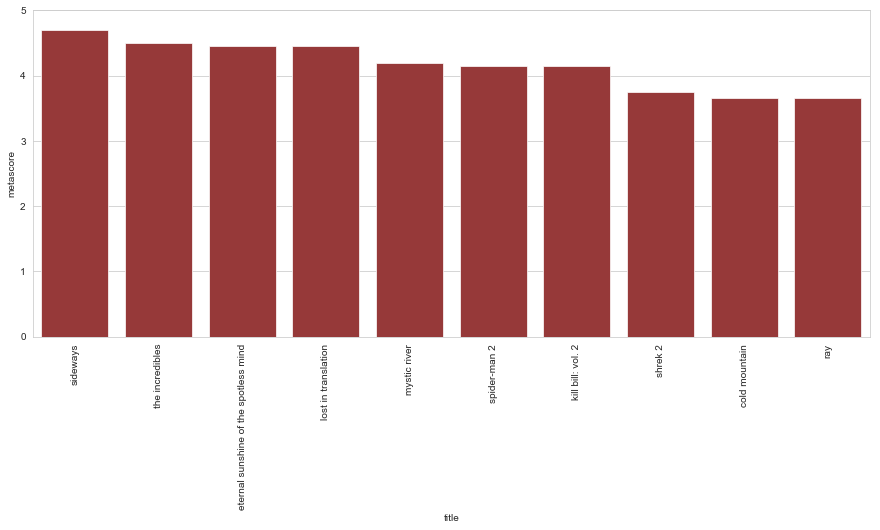

In [113]:
idxy = xxx4.index
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))
y,x =  xxx4, idxy
g =sns.barplot(x,y, label = 'user avg rate', color = "brown",linewidth=0.7)
#plt.legend(loc='upper left')
plt.xticks(rotation=90,fontsize=10)
#g.set(xlabel='Years', ylabel='Movie Count')
g.set_ylim(0,5)

__I critici di metacritic risultano più "critici" nella scelta dei voti, rispetto a quelli di rotten__

In [114]:
met = xxx4.to_frame

In [115]:
met

<bound method Series.to_frame of title
sideways                                 4.70
the incredibles                          4.50
eternal sunshine of the spotless mind    4.45
lost in translation                      4.45
mystic river                             4.20
spider-man 2                             4.15
kill bill: vol. 2                        4.15
shrek 2                                  3.75
cold mountain                            3.65
ray                                      3.65
Name: metascore, dtype: float64>

# Directors

In [337]:
rott.groupby("director")["user_avg_rate"].mean().sort_values(ascending = False).head(10)

director
John Lasseter                                                          4.35
Terry George                                                           4.31
Pete Docter, David Silverman(co-director), Lee Unkrich(co-director)    4.28
Karan Johar                                                            4.25
John Lasseter, Ash Brannon(co-director), Lee Unkrich(co-director)      4.23
Yoshiaki Kawajiri                                                      4.21
Tony Kaye                                                              4.19
Hayao Miyazaki, Kirk Wise                                              4.17
Terry Gilliam, Terry Jones                                             4.17
Andrew Adamson, Kelly Asbury, Conrad Vernon                            4.14
Name: user_avg_rate, dtype: float64

In [347]:
rott.groupby("director")["rating"].mean().sort_values(ascending = False).head(10)

director
Franc Roddam                          5.0
Michael Powell                        5.0
Ermanno Olmi                          5.0
Errol Morris                          5.0
F.W. Murnau                           5.0
Federico Fellini, Alberto Lattuada    5.0
Frank Beyer                           5.0
Steven Zaillian                       5.0
Mikhail Kalatozov                     5.0
Michael Powell, Emeric Pressburger    5.0
Name: rating, dtype: float64

In [341]:
rott[rott["director"] == "Malcolm Clarke"]

,Movie,count_rotten,Id,Year,tconst,actors,director,genre,writer,rating,awards,StdDev,count,diff,user_avg_rate
4560,chasing_holden,5,14041,2001,tt0217319,"DJ Qualls, Rachel Blanchard, Colin Fox, Sean K...",Malcolm Clarke,"Crime, Drama",Sean Kanan,0.0,NaN,1.12,195,-2.46,2.46


In [354]:
rott[rott["rating"] == 5]

,Movie,count_rotten,Id,Year,tconst,actors,director,genre,writer,rating,awards,StdDev,count,diff,user_avg_rate
91,the_godfather,90,12293,1972,tt0068646,"Marlon Brando, Al Pacino, James Caan, Richard ...",Francis Ford Coppola,"Crime, Drama","Mario Puzo (screenplay by), Francis Ford Coppo...",5.0,Won 3 Oscars. Another 24 wins & 28 nominations.,0.79,106327,0.50,4.50
128,the_terminator,59,6196,1984,tt0088247,"Arnold Schwarzenegger, Michael Biehn, Linda Ha...",James Cameron,"Action, Sci-Fi","James Cameron, Gale Anne Hurd, William Wisher ...",5.0,6 wins & 6 nominations.,0.92,96778,1.04,3.96
266,citizen_kane,80,8832,1941,tt0033467,"Joseph Cotten, Dorothy Comingore, Agnes Mooreh...",Orson Welles,"Drama, Mystery","Herman J. Mankiewicz (original screen play), O...",5.0,Won 1 Oscar. Another 9 wins & 13 nominations.,1.04,61758,0.98,4.02
295,rear_window,64,6739,1954,tt0047396,"James Stewart, Grace Kelly, Wendell Corey, The...",Alfred Hitchcock,"Mystery, Thriller","John Michael Hayes (screenplay), Cornell Woolr...",5.0,Nominated for 4 Oscars. Another 6 wins & 8 nom...,0.83,57941,0.76,4.24
311,mary_poppins,49,14185,1964,tt0058331,"Julie Andrews, Dick Van Dyke, David Tomlinson,...",Robert Stevenson,"Comedy, Family, Fantasy, Musical","Bill Walsh (screenplay), Don DaGradi (screenpl...",5.0,Won 5 Oscars. Another 15 wins & 17 nominations.,0.93,55444,0.85,4.15
340,toy_story,82,13673,1995,tt0114709,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy","John Lasseter (original story by), Pete Docter...",5.0,Nominated for 3 Oscars. Another 23 wins & 17 n...,0.79,51306,0.65,4.35
424,cool_hand_luke,49,5561,1967,tt0061512,"Paul Newman, George Kennedy, J.D. Cannon, Lou ...",Stuart Rosenberg,"Crime, Drama","Donn Pearce (screenplay), Frank Pierson (scree...",5.0,Won 1 Oscar. Another 3 wins & 9 nominations.,0.84,42100,0.86,4.14
533,the_maltese_falcon,53,3315,1941,tt0033870,"Humphrey Bogart, Mary Astor, Gladys George, Pe...",John Huston,"Film-Noir, Mystery","John Huston (screen play by), Dashiell Hammett...",5.0,Nominated for 3 Oscars. Another 4 wins.,0.91,32866,0.97,4.03
600,singin_in_the_rain,50,2360,1952,tt0045152,"Gene Kelly, Donald O'Connor, Debbie Reynolds, ...","Stanley Donen, Gene Kelly","Comedy, Musical, Romance","Betty Comden (story by), Adolph Green (story by)",5.0,Nominated for 2 Oscars. Another 5 wins & 7 nom...,0.95,29225,0.90,4.10
721,the_philadelphia_story,57,10620,1940,tt0032904,"Cary Grant, Katharine Hepburn, James Stewart, ...",George Cukor,"Comedy, Romance","Donald Ogden Stewart (screen play), Philip Bar...",5.0,Won 2 Oscars. Another 3 wins & 5 nominations.,0.93,23973,0.94,4.06


In [348]:
metac.groupby("director")["metascore"].mean().sort_values(ascending = False).head(10)


director
Norman Ferguson, T. Hee, Wilfred Jackson, Jack Kinney, Hamilton Luske, Bill Roberts, Ben Sharpsteen                                                                                 4.95
Orson Welles                                                                                                                                                                        4.95
Stanley Donen, Gene Kelly                                                                                                                                                           4.95
Joseph L. Mankiewicz                                                                                                                                                                4.90
Carol Reed                                                                                                                                                                          4.85
Hayao Miyazaki, Kirk Wise                                         

In [352]:
metac[metac["director"]=="Norman Ferguson, T. Hee, Wilfred Jackson, Jack Kinney, Hamilton Luske, Bill Roberts, Ben Sharpsteen"]

,index,Positive,Mixed,Negative,tconst,movie_id,title,Year,actors,director,genre,metascore,writer,user_avg_rate,StdDev,count,diff,awards,tot_voti_met,std_met
2067,2068,0,2,13,tt0032910,4791,pinocchio,1940,"Jack Bailey, Mel Blanc, Billy Bletcher, Don Br...","Norman Ferguson, T. Hee, Wilfred Jackson, Jack...","Animation,Comedy,Family,Fantasy,Musical",4.95,"Carlo Collodi (from the story by), Ted Sears (...",3.61,0.97,1290,1.34,Won 2 Oscars. Another 4 wins.,15,0.509902


In [731]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1